# MNIST Digit Classification using Convolutional Neural Networks (CNN)

Predict handwritten digits (0–9) from the **MNIST dataset** using a **CNN** in TensorFlow/Keras.  
This project demonstrates **data preprocessing, model building, training, evaluation, and saving/loading models**.

## Step 1: Import Libraries
We import the necessary libraries for data manipulation, plotting, and building our CNN model.

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

## Step 2: Load and Explore Dataset
- MNIST contains 60,000 training images and 10,000 test images.
- Each image is 28x28 pixels in grayscale.
- Labels are digits from 0 to 9.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


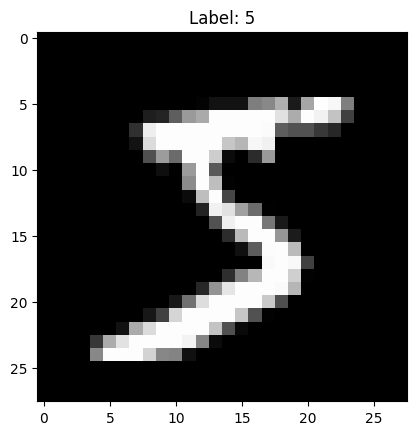

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

## Step 3: Preprocess Data
- Normalize pixel values to range [0, 1].
- Reshape images for CNN input.
- Convert labels to one-hot vectors.

In [4]:
# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("X_train shape after reshape:", X_train.shape)
print("y_train shape after one-hot:", y_train.shape)

X_train shape after reshape: (60000, 28, 28, 1)
y_train shape after one-hot: (60000, 10)


## Step 4: Build CNN Model
- Two convolutional layers with ReLU activation, followed by max pooling.
- Flatten layer to convert 2D features to 1D.
- Dense layer with 128 neurons and ReLU.
- Output layer with 10 neurons (digits 0–9) with softmax activation.
- Compiled with Adam optimizer and categorical crossentropy loss.

In [6]:
# Build the CNN
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28,28,1)),           # Explicit input layer
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the CNN
- Train for 10 epochs with batch size 32
- Use 10% of training data for validation
- Monitor accuracy and loss during training

In [7]:
# Train the CNN
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9588 - loss: 0.1345 - val_accuracy: 0.9857 - val_loss: 0.0519
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9861 - loss: 0.0436 - val_accuracy: 0.9890 - val_loss: 0.0436
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9909 - loss: 0.0294 - val_accuracy: 0.9903 - val_loss: 0.0326
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9900 - val_loss: 0.0329
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9939 - loss: 0.0172 - val_accuracy: 0.9900 - val_loss: 0.0434
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9897 - val_loss: 0.0514
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9910 - val_loss: 0.0378
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9975 - loss: 0

## Step 6: Evaluate the Model
- Evaluate on test set
- Print test accuracy and loss

In [8]:
# Evaluate the CNN on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0388
Test Accuracy: 0.9902
Test Loss: 0.0388


## Step 7: Visualize Training History
- Plot accuracy vs. epochs
- Plot loss vs. epochs

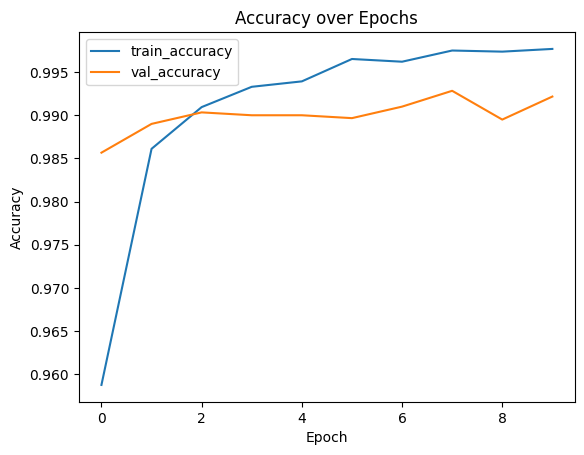

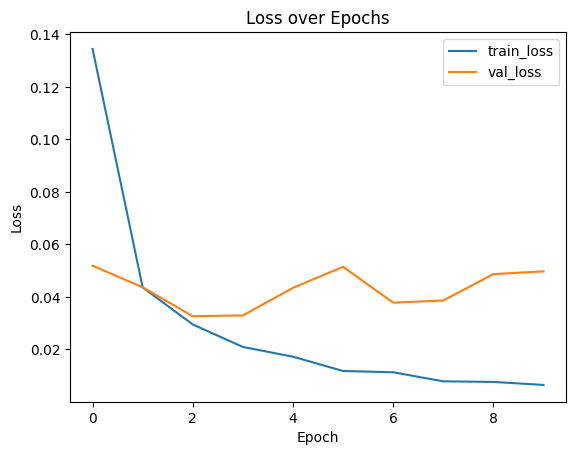

In [9]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 8: Save the Trained Model
- Save the CNN in `.keras` format for full compatibility
- Allows reuse without retraining

In [11]:
# Save the model in the native Keras format
model.save("models/mnist_cnn_model.keras")
print("Model saved successfully in .keras format!")

Model saved successfully in .keras format!


## Step 9: Load the Model
- Load the saved model anytime
- Verify test accuracy

In [12]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("models/mnist_cnn_model.keras")

# Test the loaded model
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded model test accuracy: {test_accuracy:.4f}")

  8/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0037  

/opt/anaconda3/envs/cnn_env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0388
Loaded model test accuracy: 0.9902


In [13]:
# Save the model
model.save("models/mnist_cnn_model.keras")